<a href="https://colab.research.google.com/github/gunrtnk/project_data/blob/main/used-car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final Project CS352 Data-Driven Decision Making For Business (2/64)

Prediction ราคารถยนต์มือสองจากจำนวนปีและจำนวนกิโลเมตรที่เคยใช้งาน 

**data** **understanding**

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


In [7]:
from sklearn.metrics import mean_squared_error

In [8]:
from google.colab import drive
drive.mount('/content/drive')
car_df = pd.read_csv('/content/drive/MyDrive/cs352/car_used_dataframe.csv')

Mounted at /content/drive


In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [10]:
car_df.head()

,brand,model,year,km driven,price
0,Toyota,YARISSPORTPREMIUM1.2,2020,25670,565000
1,Mitsubishi,MIRAGEGLSLIMITEDEDITION1.2,2019,41578,356000
2,Mitsubishi,MIRAGEGLX1.2,2018,64237,316000
3,Honda,BRIOAMAZEV1.2,2018,81377,356000
4,Toyota,YARISG1.2,2017,95328,416000


In [11]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   brand      539 non-null    object
 1   model      539 non-null    object
 2   year       539 non-null    int64 
 3   km driven  539 non-null    int64 
 4   price      539 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 21.2+ KB


In [12]:
car_df.shape

(539, 5)

In [13]:
car_df.describe()

,year,km driven,price
count,539.000000,539.000000,5.390000e+02
mean,2017.693878,58661.085343,5.227369e+05
std,2.275001,42245.358184,2.413161e+05
min,2011.000000,10.000000,2.140000e+05
25%,2017.000000,25165.500000,3.690000e+05
50%,2018.000000,47218.000000,4.590000e+05
75%,2019.000000,82711.000000,5.940000e+05
max,2022.000000,179298.000000,3.200000e+06


ไม่มีค่า outliers

In [14]:
car_df['price'].max()

3200000

In [15]:
car_df['price'].min()

214000

In [16]:
car_df['model'].value_counts()

ATTRAGEGLX1.2                     27
ALMERAESPORTECH1.2                17
MARCHE1.2                         17
MIRAGEGLX1.2                      14
YARISG1.2                         13
                                  ..
ALMERAES1.2                        1
HILUXREVOSMARTCABEPRERUNNER2.4     1
SWIFTGA1.2                         1
BT-50PRODOUBLECABHI-RACER2.2       1
JAZZSV1.5                          1
Name: model, Length: 185, dtype: int64

In [17]:
car_df['brand'].value_counts()

Toyota           177
Honda            106
Mitsubishi        73
Nissan            70
Mazda             51
Suzuki            32
Ford              16
Isuzu             11
Mercedes-Benz      2
MG                 1
Name: brand, dtype: int64

In [18]:
print(car_df['model'].unique())

['YARISSPORTPREMIUM1.2' 'MIRAGEGLSLIMITEDEDITION1.2' 'MIRAGEGLX1.2'
 'BRIOAMAZEV1.2' 'YARISG1.2' 'MARCHE1.2' 'CR-VE2WD2.4' 'CR-VE2.0'
 'CIAZGL1.2' 'XPANDERGT1.5' 'YARISENTRY1.2' 'YARISG+1.2' 'YARISATIVE1.2'
 'COROLLAALTISE1.8' 'RANGERDOUBLECABHI-RIDERWILDTRAK2.2' 'VIOSE1.5'
 'ACCORDTURBOEL1.5' 'CX-3PROACTIVE2.0' 'YARISATIVSPORTPREMIUM1.2'
 'YARISHIGH1.2' 'FORTUNERLEGENDER4WD2.8' '2SSPORT1.3'
 'HILUXREVODOUBLECABPRERUNNERHIGH2.4' 'HILUXREVODOUBLECABPRERUNNERMID2.4'
 'NOTEV1.2' 'YARISATIVMID1.2' 'X-TRAIL2.5' 'YARISE1.2' 'CX-3SP2.0'
 'ALMERAESPORTECH1.2' 'CR-VEL4WD2.4'
 'RANGERDOUBLECABBI-TURBO4WDWILDTRAK2.0'
 'HILUXREVOSMARTCABEPRERUNNERTRDSPORTIVO2.4' 'HR-VE1.8' 'CAMRYG2.0'
 'ATTRAGEGLX1.2' '2S(LEATHER)1.3' 'FORTUNERV2.4' 'YARISSPORT1.2'
 'VIOSJ1.5' 'BRIOV1.2' 'HR-VRS1.8' 'CR-VS2WD(5SEAT)2.4' 'JAZZV1.5'
 'NOTEE1.2' 'YARISATIVSPORT1.2' 'HILUXREVODOUBLECABEPRERUNNER2.4'
 'VIOSHIGH1.5' 'CIAZRS1.2' 'MOBILIOS1.5' 'CIVICEL1.8' 'FORTUNERV2.5'
 'ZSD+1.5' 'COROLLAALTISGRSPORT1.8' 'CX-5C2.0' 'SIE

In [19]:
car_df.isnull().sum()

brand        0
model        0
year         0
km driven    0
price        0
dtype: int64

In [20]:
#add age car
current_year=2022
car_df['car_age']=current_year-car_df['year']

In [21]:
car_df


,brand,model,year,km driven,price,car_age
0,Toyota,YARISSPORTPREMIUM1.2,2020,25670,565000,2
1,Mitsubishi,MIRAGEGLSLIMITEDEDITION1.2,2019,41578,356000,3
2,Mitsubishi,MIRAGEGLX1.2,2018,64237,316000,4
3,Honda,BRIOAMAZEV1.2,2018,81377,356000,4
4,Toyota,YARISG1.2,2017,95328,416000,5
...,...,...,...,...,...,...
534,Toyota,VIOSE1.5,2017,44736,414000,5
535,Toyota,YARISATIVE1.2,2017,45236,414000,5
536,Toyota,FORTUNERV2.4,2017,159429,964000,5
537,Honda,JAZZSV1.5,2014,159872,464000,8


In [22]:
car_df['car_age'].max()

11

In [23]:
car_df['car_age'].min()

0

In [24]:
car_df['price']=car_df['price'].astype('float')
car_df['year']=car_df['year'].astype('float')
car_df['km driven']=car_df['km driven'].astype('float')
car_df['car_age']=car_df['car_age'].astype('float')
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   brand      539 non-null    object 
 1   model      539 non-null    object 
 2   year       539 non-null    float64
 3   km driven  539 non-null    float64
 4   price      539 non-null    float64
 5   car_age    539 non-null    float64
dtypes: float64(4), object(2)
memory usage: 25.4+ KB


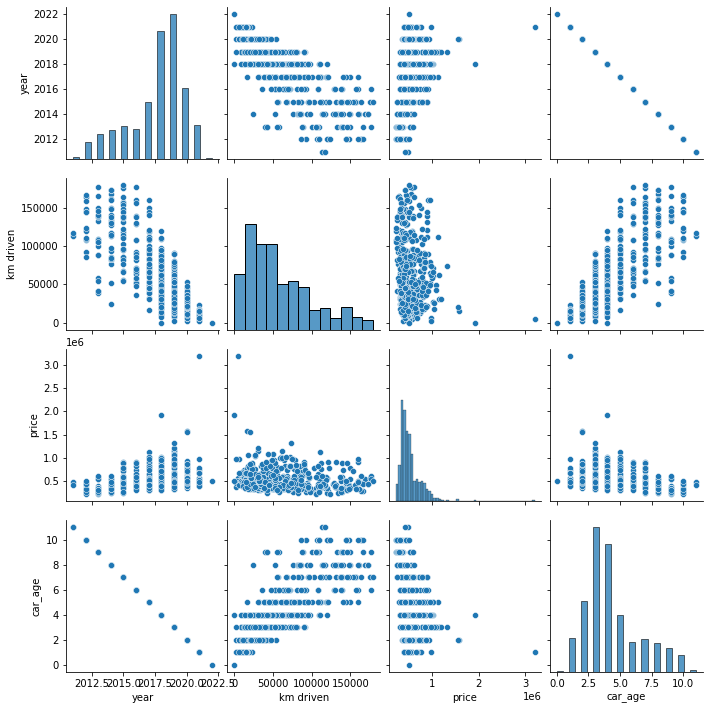

In [25]:
sns.pairplot(car_df)

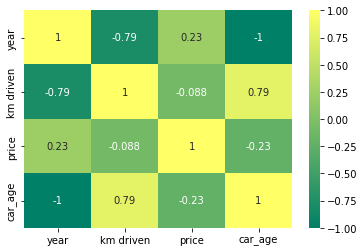

In [26]:
sns.heatmap(car_df.corr(),annot=True,cmap='summer')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


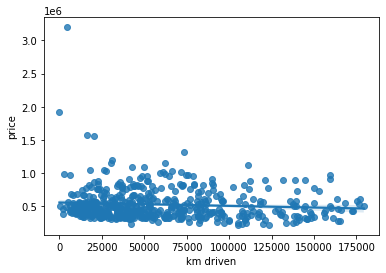

In [27]:
sns.regplot('km driven','price',data=car_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


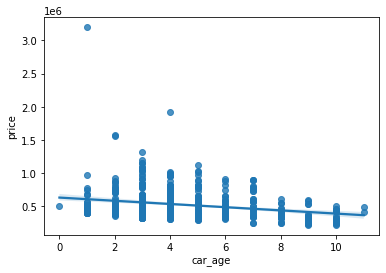

In [28]:
sns.regplot('car_age','price',data=car_df)

In [29]:
# plt.figure(figsize=(10,5))
# sns.barplot('car_age','price',data=car_df)

In [30]:
# f, ax = plt.subplots(figsize=(15,8))
# sns.distplot(car_df['price'])


In [31]:
car_data=car_df

In [32]:
car_data

,brand,model,year,km driven,price,car_age
0,Toyota,YARISSPORTPREMIUM1.2,2020.0,25670.0,565000.0,2.0
1,Mitsubishi,MIRAGEGLSLIMITEDEDITION1.2,2019.0,41578.0,356000.0,3.0
2,Mitsubishi,MIRAGEGLX1.2,2018.0,64237.0,316000.0,4.0
3,Honda,BRIOAMAZEV1.2,2018.0,81377.0,356000.0,4.0
4,Toyota,YARISG1.2,2017.0,95328.0,416000.0,5.0
...,...,...,...,...,...,...
534,Toyota,VIOSE1.5,2017.0,44736.0,414000.0,5.0
535,Toyota,YARISATIVE1.2,2017.0,45236.0,414000.0,5.0
536,Toyota,FORTUNERV2.4,2017.0,159429.0,964000.0,5.0
537,Honda,JAZZSV1.5,2014.0,159872.0,464000.0,8.0


In [33]:
len(car_data)

539

In [34]:
car_data['model'].value_counts().head(10)

ATTRAGEGLX1.2           27
ALMERAESPORTECH1.2      17
MARCHE1.2               17
MIRAGEGLX1.2            14
YARISG1.2               13
YARISE1.2               12
YARISJ1.2               12
SWIFTGL1.2              10
YARISSPORTPREMIUM1.2     9
CIAZGL1.2                9
Name: model, dtype: int64

**Data** **Preparation**

In [35]:
titles=list(car_data.columns)
titles

['brand', 'model', 'year', 'km driven', 'price', 'car_age']

In [36]:
titles[0],titles[1]=titles[1],titles[0]
titles

['model', 'brand', 'year', 'km driven', 'price', 'car_age']

In [37]:
car_data=car_data[titles]
car_data

,model,brand,year,km driven,price,car_age
0,YARISSPORTPREMIUM1.2,Toyota,2020.0,25670.0,565000.0,2.0
1,MIRAGEGLSLIMITEDEDITION1.2,Mitsubishi,2019.0,41578.0,356000.0,3.0
2,MIRAGEGLX1.2,Mitsubishi,2018.0,64237.0,316000.0,4.0
3,BRIOAMAZEV1.2,Honda,2018.0,81377.0,356000.0,4.0
4,YARISG1.2,Toyota,2017.0,95328.0,416000.0,5.0
...,...,...,...,...,...,...
534,VIOSE1.5,Toyota,2017.0,44736.0,414000.0,5.0
535,YARISATIVE1.2,Toyota,2017.0,45236.0,414000.0,5.0
536,FORTUNERV2.4,Toyota,2017.0,159429.0,964000.0,5.0
537,JAZZSV1.5,Honda,2014.0,159872.0,464000.0,8.0


In [38]:
car_final=car_data.set_index('model')
car_final

,brand,year,km driven,price,car_age
model,,,,,
YARISSPORTPREMIUM1.2,Toyota,2020.0,25670.0,565000.0,2.0
MIRAGEGLSLIMITEDEDITION1.2,Mitsubishi,2019.0,41578.0,356000.0,3.0
MIRAGEGLX1.2,Mitsubishi,2018.0,64237.0,316000.0,4.0
BRIOAMAZEV1.2,Honda,2018.0,81377.0,356000.0,4.0
YARISG1.2,Toyota,2017.0,95328.0,416000.0,5.0
...,...,...,...,...,...
VIOSE1.5,Toyota,2017.0,44736.0,414000.0,5.0
YARISATIVE1.2,Toyota,2017.0,45236.0,414000.0,5.0
FORTUNERV2.4,Toyota,2017.0,159429.0,964000.0,5.0


In [39]:
car_model1=car_final.filter(regex='ATTRAGEGLX1.2',axis=0)

car_model1= รถรุ่นATTRAGEGLX1.2ทั้งหมด

In [40]:
car_model1

,brand,year,km driven,price,car_age
model,,,,,
ATTRAGEGLX1.2,Mitsubishi,2019.0,13594.0,349000.0,3.0
ATTRAGEGLX1.2,Mitsubishi,2019.0,23102.0,336000.0,3.0
ATTRAGEGLX1.2,Mitsubishi,2019.0,33996.0,349000.0,3.0
ATTRAGEGLX1.2,Mitsubishi,2019.0,35472.0,339000.0,3.0
ATTRAGEGLX1.2,Mitsubishi,2019.0,25573.0,356000.0,3.0
ATTRAGEGLX1.2,Mitsubishi,2019.0,14685.0,359000.0,3.0
ATTRAGEGLX1.2,Mitsubishi,2018.0,33589.0,309000.0,4.0
ATTRAGEGLX1.2,Mitsubishi,2019.0,28668.0,326000.0,3.0
ATTRAGEGLX1.2,Mitsubishi,2019.0,42505.0,323000.0,3.0


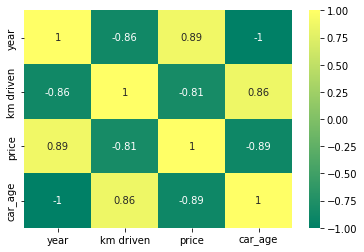

In [41]:
sns.heatmap(car_model1.corr(),annot=True,cmap='summer')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


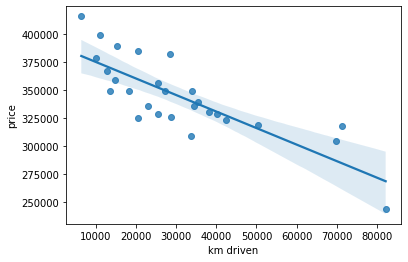

In [42]:
sns.regplot('km driven','price',data=car_model1)

hign negative correlation 👆👇

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


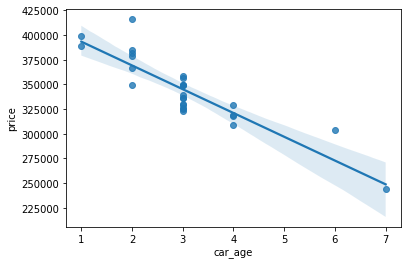

In [43]:
sns.regplot('car_age','price',data=car_model1)

In [44]:
#ดูความสัมพันธ์
car_model1[['price','km driven', 'car_age']].corr()

,price,km driven,car_age
price,1.000000,-0.813310,-0.887964
km driven,-0.813310,1.000000,0.863089
car_age,-0.887964,0.863089,1.000000


clean & drop columns

In [45]:
#drop columns ที่ไม่จำเป็นต่อ model
car_df_ATTRAGEGLX=car_model1
car_df_ATTRAGEGLX=car_df_ATTRAGEGLX.drop(columns='brand')
car_df_ATTRAGEGLX=car_df_ATTRAGEGLX.drop(columns='year')
car_df_ATTRAGEGLX

,km driven,price,car_age
model,,,
ATTRAGEGLX1.2,13594.0,349000.0,3.0
ATTRAGEGLX1.2,23102.0,336000.0,3.0
ATTRAGEGLX1.2,33996.0,349000.0,3.0
ATTRAGEGLX1.2,35472.0,339000.0,3.0
ATTRAGEGLX1.2,25573.0,356000.0,3.0
ATTRAGEGLX1.2,14685.0,359000.0,3.0
ATTRAGEGLX1.2,33589.0,309000.0,4.0
ATTRAGEGLX1.2,28668.0,326000.0,3.0
ATTRAGEGLX1.2,42505.0,323000.0,3.0


In [46]:
car_df_ATTRAGEGLX.index = np.arange(0, len(car_df_ATTRAGEGLX))
car_df_ATTRAGEGLX

,km driven,price,car_age
0,13594.0,349000.0,3.0
1,23102.0,336000.0,3.0
2,33996.0,349000.0,3.0
3,35472.0,339000.0,3.0
4,25573.0,356000.0,3.0
5,14685.0,359000.0,3.0
6,33589.0,309000.0,4.0
7,28668.0,326000.0,3.0
8,42505.0,323000.0,3.0
9,20471.0,385000.0,2.0


test regression

In [47]:
#สร้างobject
#model=LinearRegression()
#model

In [48]:
#model.fit(car_model1[['price']], car_model1['km driven'])

In [49]:
#สร้างmodelเพื่อทำนายราคารถยนต์จากจำนวนกิโลเมตร
#X2=car_model1[['km driven']] #2D array  [[2d]]
#y2=car_model1['price']

In [50]:
#model_km=model.fit(X2,y2)

In [51]:
#model_km.score(X2,y2) # R score

In [52]:
#model_km.predict([[50000]]) #predict ว่าถ้ารถเคยวิ่ง n กิโลเมตร จะราคาเท่าไร

In [53]:
#predictแบบเป็นช่วงๆๆๆๆๆ
#np.arange(10000,50000, 5000) #ค่า10k-50k ช่วงละ 5k

In [54]:
#np.arange(10000,50000, 5000).reshape(-1,1) #รีเชปให้เปนทูดี

In [55]:
#model_km.predict(np.arange(10000,50000, 5000).reshape(-1,1))

ราคา=intercept coef(ค่าสัมปสิทธิ์)+(age coef)*age. +(km coef)*km

multiple lenear regression test

In [56]:
#car_model1_final=car_model1.drop(columns='brand')

In [57]:
#car_model1_final=car_model1_final.drop(columns='year')
#car_model1_final=car_model1_final.drop(columns='year')
#car_model1_final

In [58]:
#car_model_test1=car_model1_final

In [59]:
#car_model_test1.index = np.arange(0, len(car_model_test1))
#car_model_test1

In [60]:
#x1=car_model_test1.drop(columns='price')
#y1=car_model_test1['price']
#modeltest=LinearRegression()
#modeltest.fit(x1,y1)

In [61]:
#modeltest.predict([[20000,2]])

In [62]:
#car_model_test1.info()

In [63]:
#prediction=modeltest.predict(x1)

#dc=pd.concat([car_model_test1['price'],pd.Series(prediction,name='predict_price')],axis='columns')
#dc

In [64]:
#modeltest.coef_

In [65]:
#modeltest.score(x1,y1) # R score

In [66]:

#car_df_ATTRAGEGLX1=car_df_ATTRAGEGLX


**modelling**


split data tarin and test

In [67]:
x_col=['km driven', 'car_age']
y_col=['price']

In [68]:
X=car_df_ATTRAGEGLX[x_col]
y=car_df_ATTRAGEGLX[y_col]

In [69]:
test_size=.3
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size,random_state=2)

In [70]:
X_train.head()

,km driven,car_age
24,50352.0,4.0
14,18247.0,2.0
4,25573.0,3.0
10,27352.0,3.0
5,14685.0,3.0


In [71]:
y_train.head()

,price
24,319000.0
14,349000.0
4,356000.0
10,349000.0
5,359000.0


Multiple Regression Model

In [72]:
#สร้างmodelสำหรับรถรุ่น attrage
model_attrage=LinearRegression()
model_attrage

LinearRegression()

In [73]:
model_attrage.fit(X_train, y_train)

LinearRegression()

Predict price

In [74]:
model_attrage.predict([[20000,5]]) #20k=km 5=age

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[331699.86665174]])

In [75]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 24 to 8
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   18 non-null     float64
dtypes: float64(1)
memory usage: 288.0 bytes


In [76]:
predict_result_test=model_attrage.predict(X_test)
predict_result_test

array([[269367.88577576],
       [356251.81989412],
       [361695.05804673],
       [348190.13749264],
       [378132.36219358],
       [356207.85388966],
       [332593.3686336 ],
       [341421.79487272],
       [368763.01082569]])

In [77]:
predict_result=model_attrage.predict(X_train)
predict_result

array([[321230.55167438],
       [363202.59875646],
       [348131.84230333],
       [346925.94530575],
       [355512.28441106],
       [339539.40253867],
       [349806.81221959],
       [342422.30300562],
       [346033.89333902],
       [328161.57854356],
       [371224.28794666],
       [306974.66648264],
       [366911.12178837],
       [375274.54221505],
       [287840.09874034],
       [351596.33896136],
       [342157.26324955],
       [336654.4685186 ]])

In [78]:

x1_test = np.squeeze(predict_result_test)
x1_test

array([269367.88577576, 356251.81989412, 361695.05804673, 348190.13749264,
       378132.36219358, 356207.85388966, 332593.3686336 , 341421.79487272,
       368763.01082569])

In [79]:
y1_test = np.squeeze(y_test)
y1_test.index = np.arange(0, len(y1_test))
y1_test

0    244000.0
1    349000.0
2    385000.0
3    329000.0
4    399000.0
5    381900.0
6    309000.0
7    339000.0
8    379000.0
Name: price, dtype: float64

In [80]:
x1_train = np.squeeze(predict_result)
x1_train

array([321230.55167438, 363202.59875646, 348131.84230333, 346925.94530575,
       355512.28441106, 339539.40253867, 349806.81221959, 342422.30300562,
       346033.89333902, 328161.57854356, 371224.28794666, 306974.66648264,
       366911.12178837, 375274.54221505, 287840.09874034, 351596.33896136,
       342157.26324955, 336654.4685186 ])

In [81]:
y1_train = np.squeeze(y_train)
y1_train.index = np.arange(0, len(y1_train))
y1_train

0     319000.0
1     349000.0
2     356000.0
3     349000.0
4     359000.0
5     329900.0
6     336000.0
7     349000.0
8     326000.0
9     329000.0
10    416000.0
11    317900.0
12    366900.0
13    389000.0
14    304000.0
15    324900.0
16    336000.0
17    323000.0
Name: price, dtype: float64

In [82]:
#concat เทียบราคาจริงกับราคาpredict ของ data train
dfc_train=pd.concat([y1_train ,pd.Series(x1_train,name='price_predict_train')],axis='columns')
dfc_train

,price,price_predict_train
0,319000.0,321230.551674
1,349000.0,363202.598756
2,356000.0,348131.842303
3,349000.0,346925.945306
4,359000.0,355512.284411
5,329900.0,339539.402539
6,336000.0,349806.812220
7,349000.0,342422.303006
8,326000.0,346033.893339
9,329000.0,328161.578544


In [83]:
#concat เทียบราคาจริงกับราคาpredict ของ data test
dfc_test=pd.concat([y1_test ,pd.Series(x1_test,name='price_predict_test')],axis='columns')
dfc_test

,price,price_predict_test
0,244000.0,269367.885776
1,349000.0,356251.819894
2,385000.0,361695.058047
3,329000.0,348190.137493
4,399000.0,378132.362194
5,381900.0,356207.853890
6,309000.0,332593.368634
7,339000.0,341421.794873
8,379000.0,368763.010826


In [84]:
#predict price 
#n1=km,n2=age
model_attrage.predict([[200000,7]]) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[189477.0402233]])

**Evaluation**

In [85]:
model_attrage.intercept_, model_attrage.coef_

(array([395780.98614632]), array([[-6.77851039e-01, -1.01048197e+04]]))

R2 or R-Squared

In [86]:
# R-squared train
model_attrage.score(X_train, y_train)

0.6453044481877764

In [87]:
# R-squared test 
model_attrage.score(X_test, y_test)

0.8209898502018833

Loss Function "*Root* *Mean* *Square* *Error*" **(RMSE)**

In [88]:
from math import sqrt

In [89]:
rmse_test=sqrt(mean_squared_error(y1_test, x1_test))
rmse_test

19351.580405047014

In [90]:
rmse_train=sqrt(mean_squared_error(y1_train, x1_train))
rmse_train

15854.799409345802

**Deployment**

```


สามารถนำ model ไปใช้เพื่อคาดการณ์ ราคารถยนต์ เพื่อประกอบการตัดสินใจในการตั้งราคาซื้อขายรถยนต์สำหรับผู้ประกอบการธุรกิจรถยนต์มือสองได้



```


